## Experiencia IV: Redes Bayesiana
### Taller de Minería de Datos Avanzados
### Profesores:
### Dr. Max Chacón Pacheco
### Dr. Felipe Bello Robles
### Experiencia realizada por Miguel Salinas González




Importación de librerías a utilizar.

bnlearn para el uso de los algoritmos de Redes Bayesianas, además contiene el set de datos en cuestión.

In [73]:
#install.packages("bnlearn")
library(bnlearn)
library(ggplot2)

### Configuración de los gráficos
Se configuran los gráficos, para que sean más grandes y así notar mejor las relaciones resultantes


In [77]:
# Ajustar el tamaño de los gráficos por defecto
options(repr.plot.width = 5, repr.plot.height = 5)


,CVP,PCWP,HIST,TPR,BP,CO,HRBP,HREK,HRSA,PAP,...,ERLO,HR,ERCA,SHNT,PVS,ACO2,VALV,VLNG,VTUB,VMCH
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,NORMAL,NORMAL,FALSE,LOW,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,NORMAL,NORMAL,HIGH,LOW,ZERO,NORMAL
2,NORMAL,NORMAL,FALSE,NORMAL,LOW,LOW,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL
3,NORMAL,HIGH,FALSE,NORMAL,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL
4,NORMAL,NORMAL,FALSE,LOW,LOW,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,NORMAL,LOW,ZERO,ZERO,LOW,NORMAL
5,NORMAL,NORMAL,FALSE,LOW,LOW,NORMAL,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL
6,NORMAL,NORMAL,FALSE,LOW,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL


     CVP            PCWP          HIST           TPR            BP      
 HIGH  : 3159   HIGH  : 4247   FALSE:18909   HIGH  :5967   HIGH  :7262  
 LOW   : 2285   LOW   : 2278   TRUE : 1091   LOW   :6135   LOW   :7875  
 NORMAL:14556   NORMAL:13475                 NORMAL:7898   NORMAL:4863  
                                                                        
      CO            HRBP           HREK           HRSA           PAP       
 HIGH  :11000   HIGH  :12968   HIGH  :12561   HIGH  :12587   HIGH  : 1151  
 LOW   : 3624   LOW   : 5792   LOW   : 5579   LOW   : 5580   LOW   : 1012  
 NORMAL: 5376   NORMAL: 1240   NORMAL: 1860   NORMAL: 1833   NORMAL:17837  
                                                                           
     SAO2           FIO2           PRSS           ECO2           MINV      
 HIGH  : 3422   LOW   : 1011   HIGH  :10270   HIGH  :  707   HIGH  : 3781  
 LOW   :15926   NORMAL:18989   LOW   : 5093   LOW   : 5922   LOW   : 1262  
 NORMAL:  652              

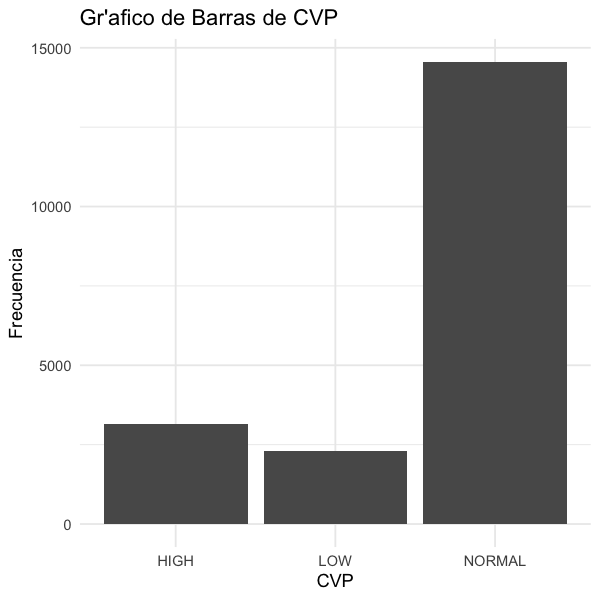

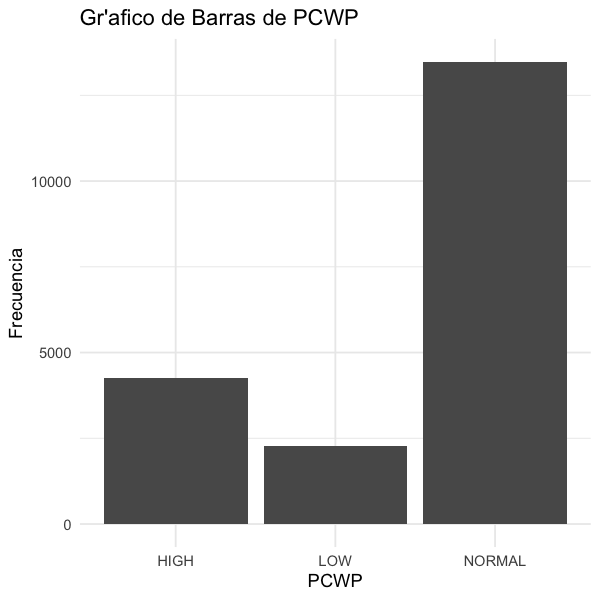

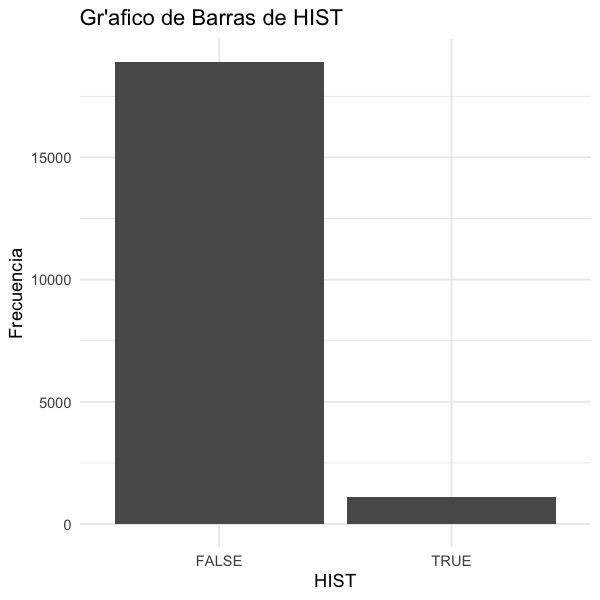

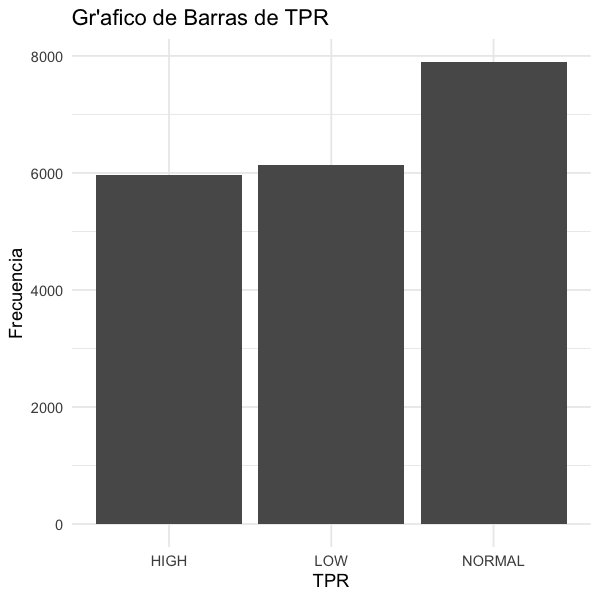

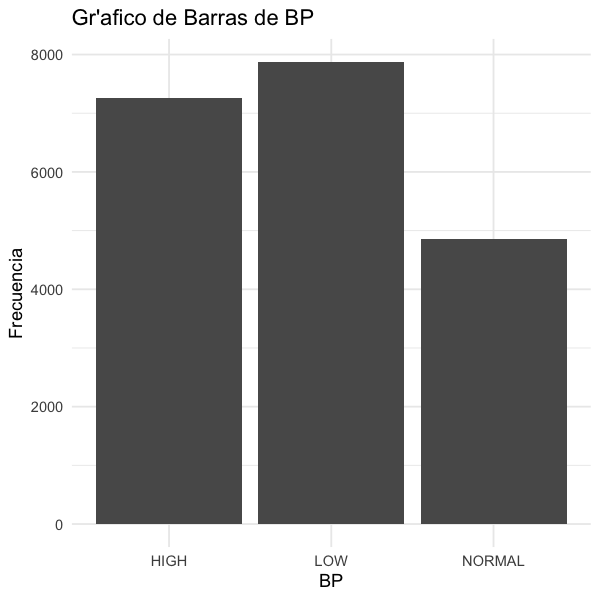

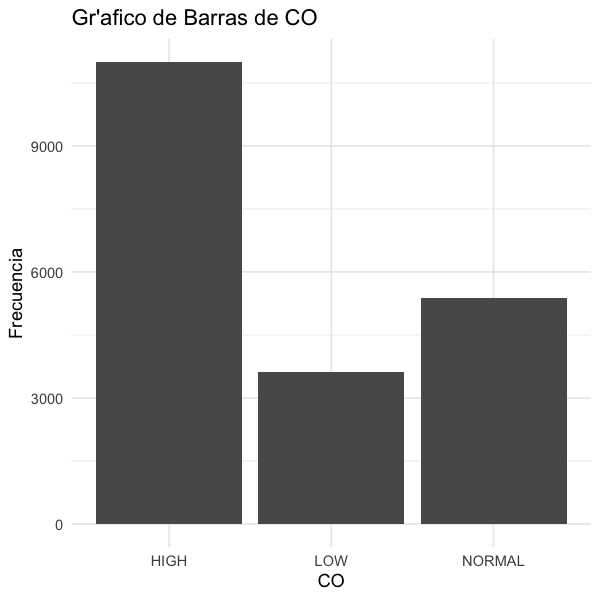

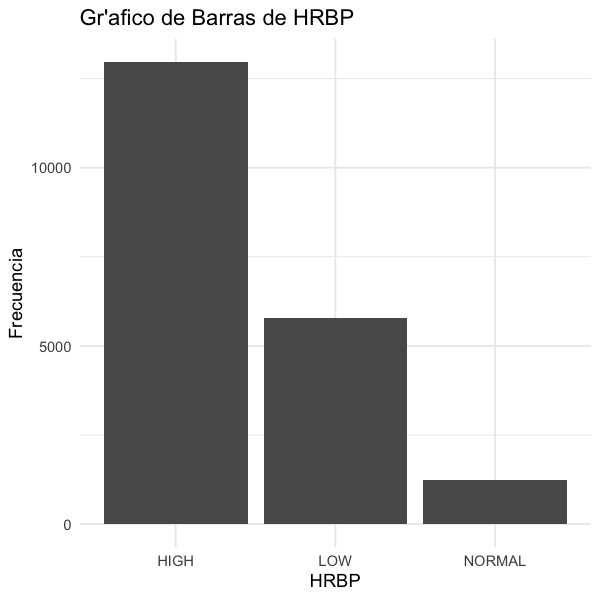

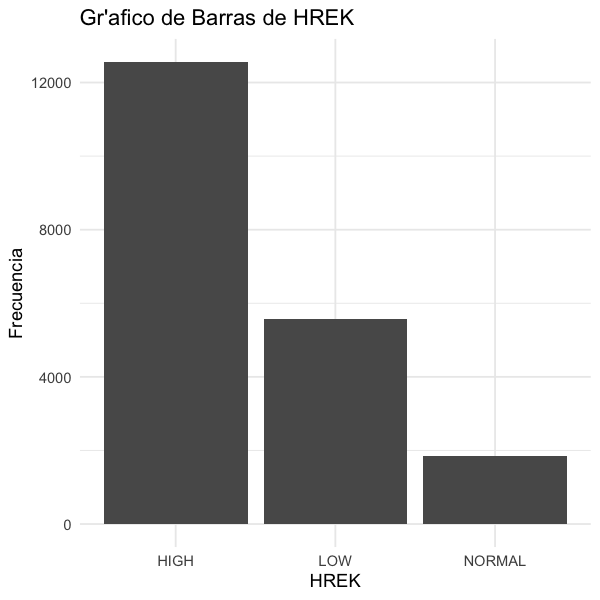

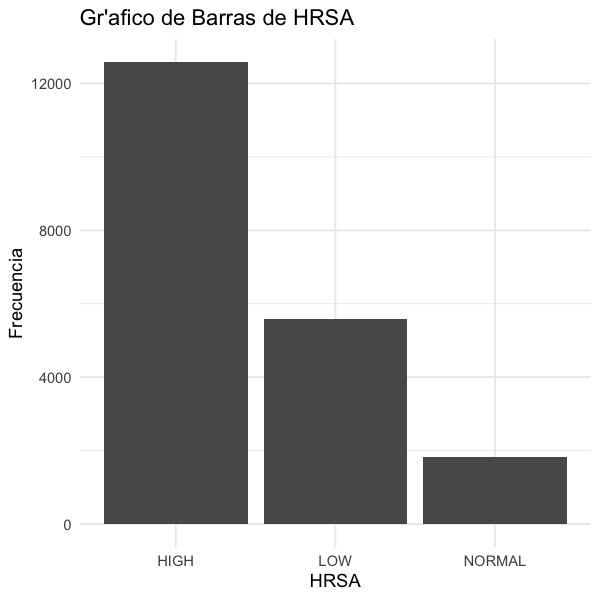

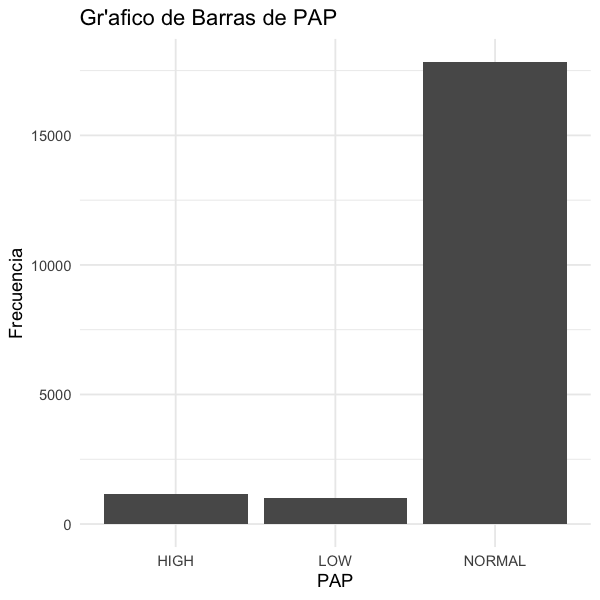

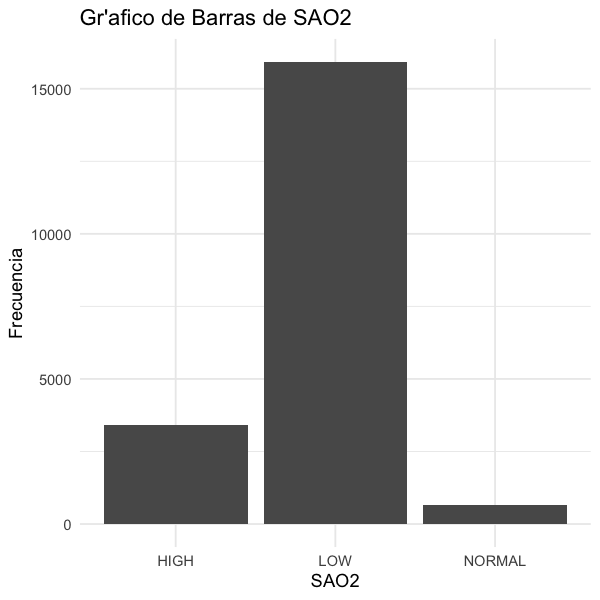

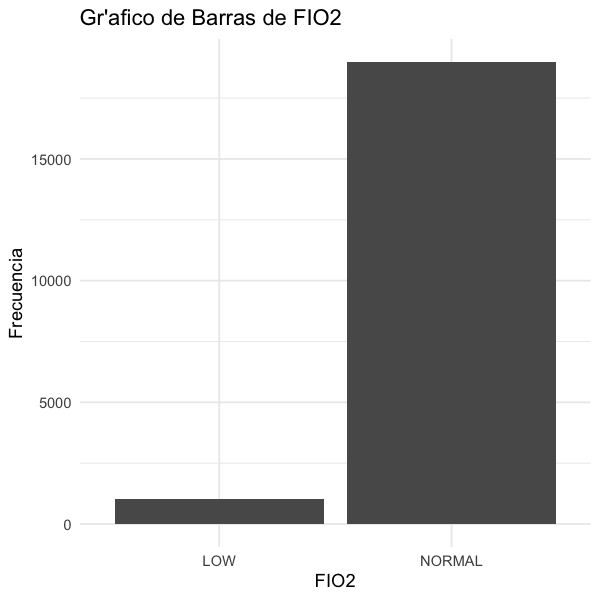

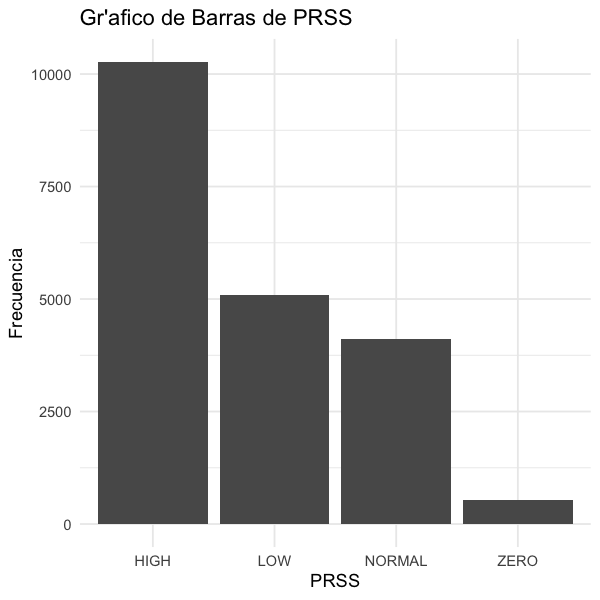

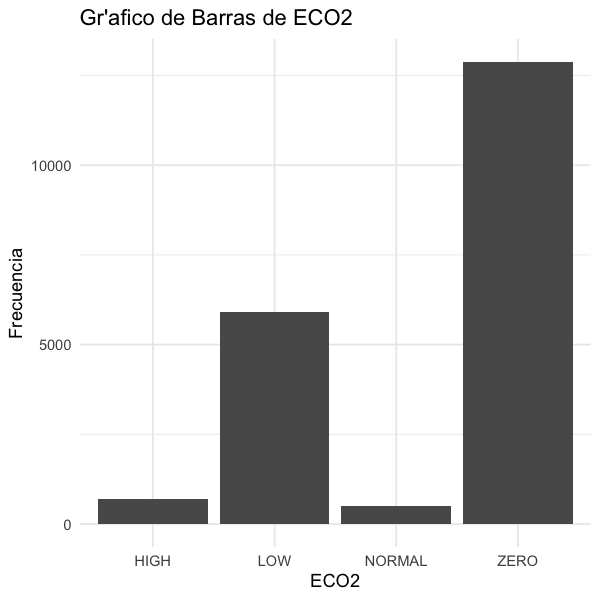

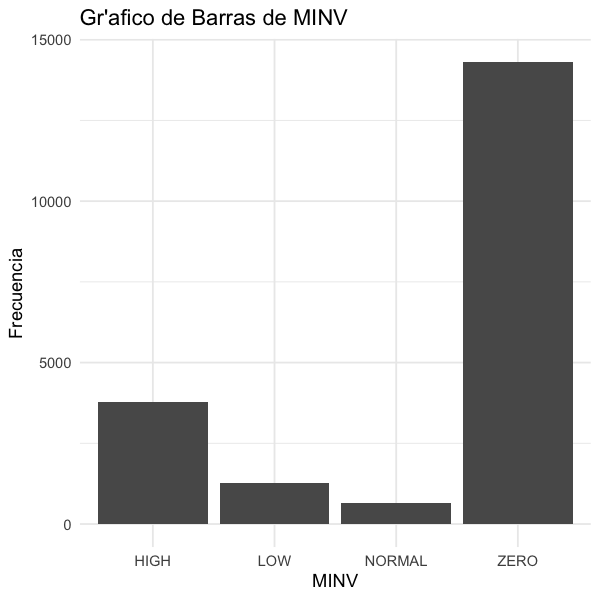

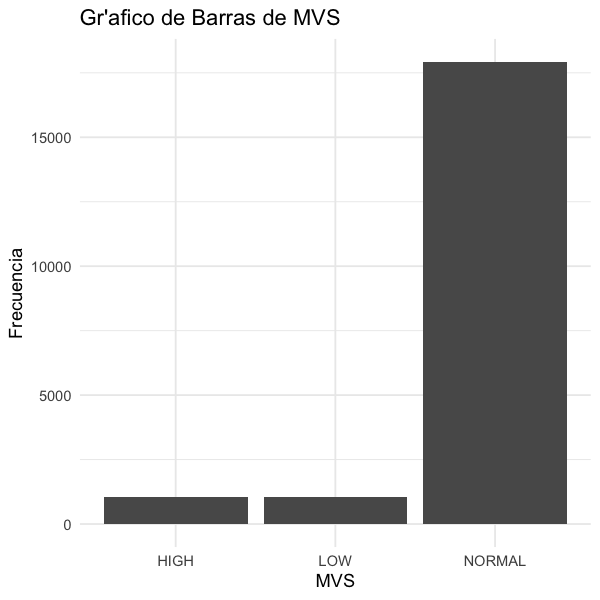

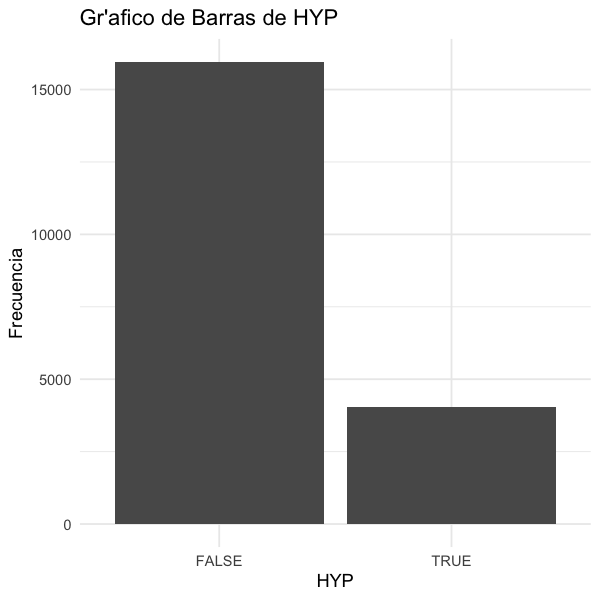

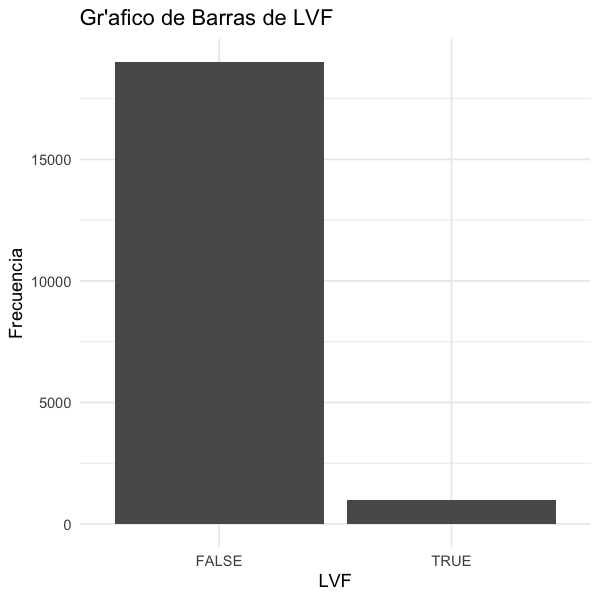

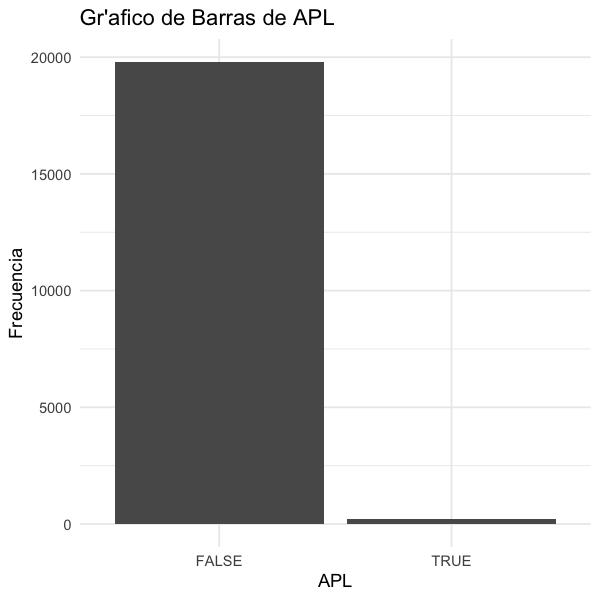

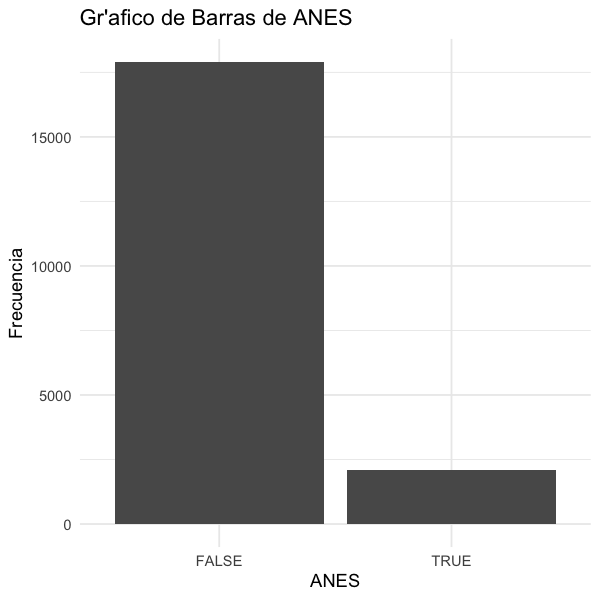

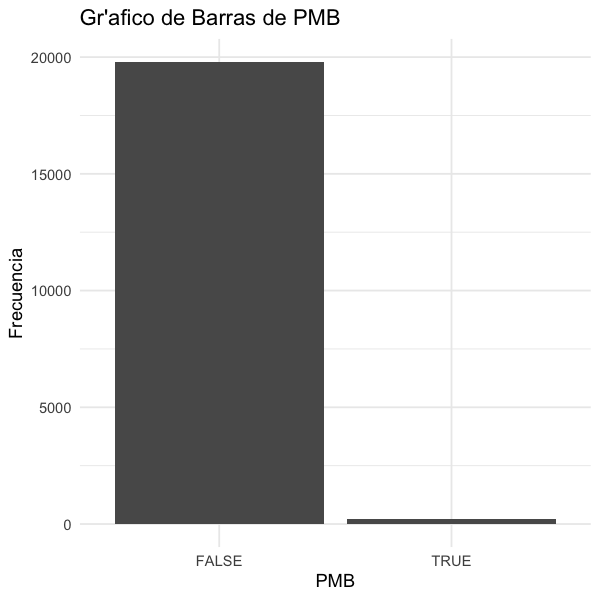

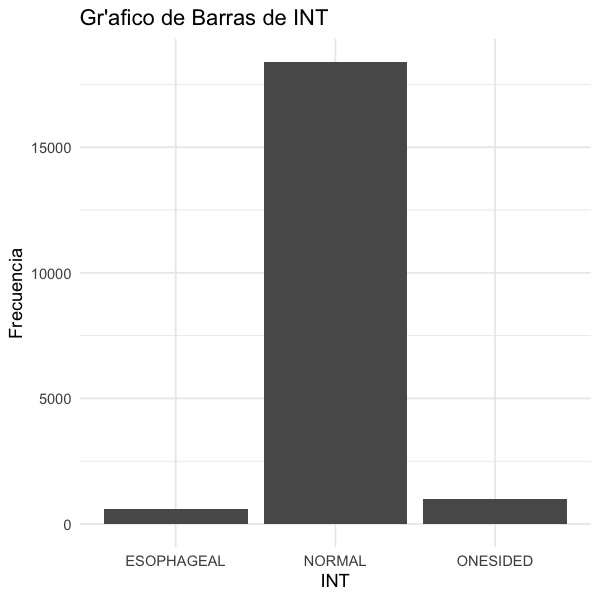

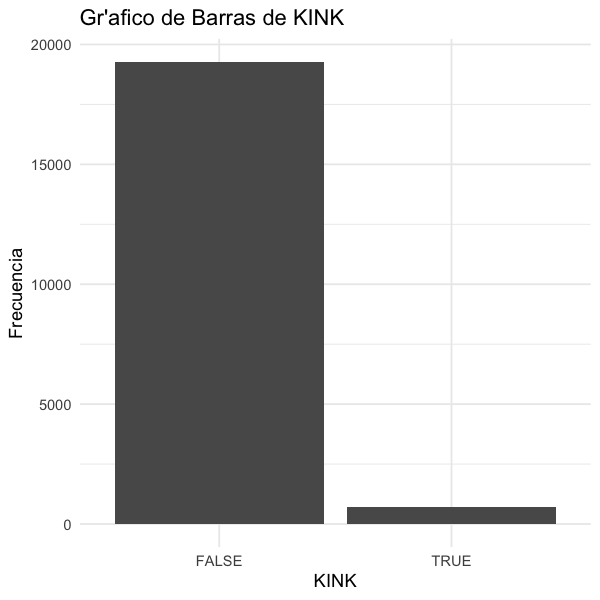

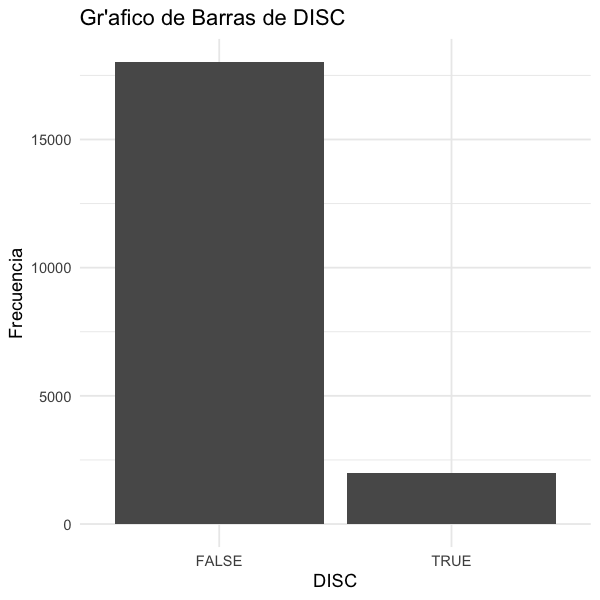

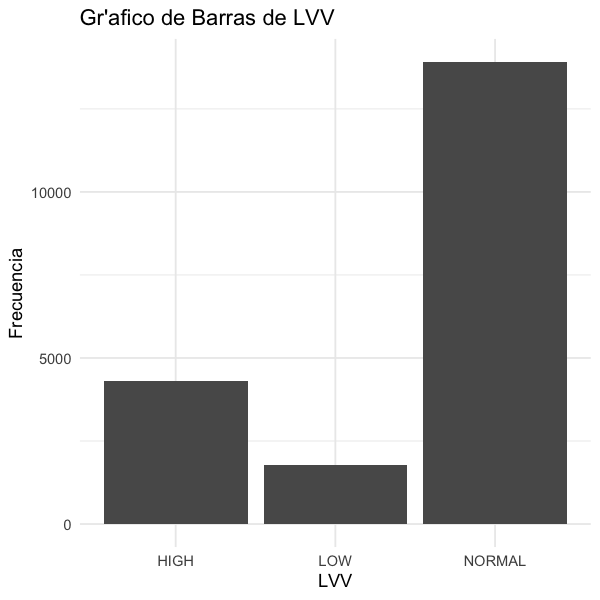

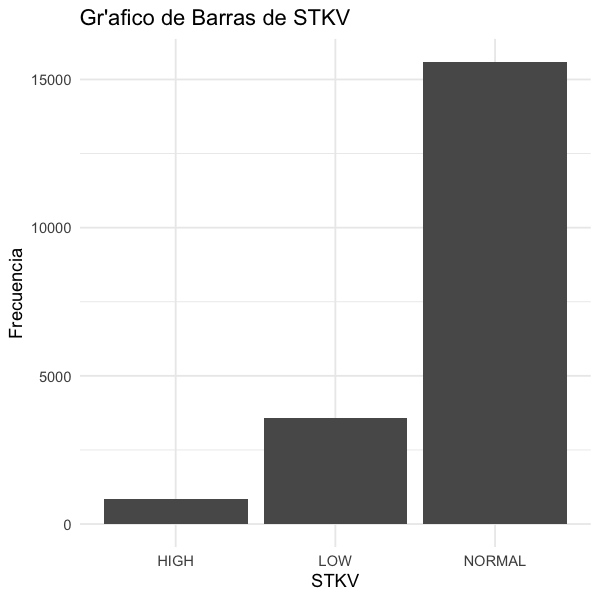

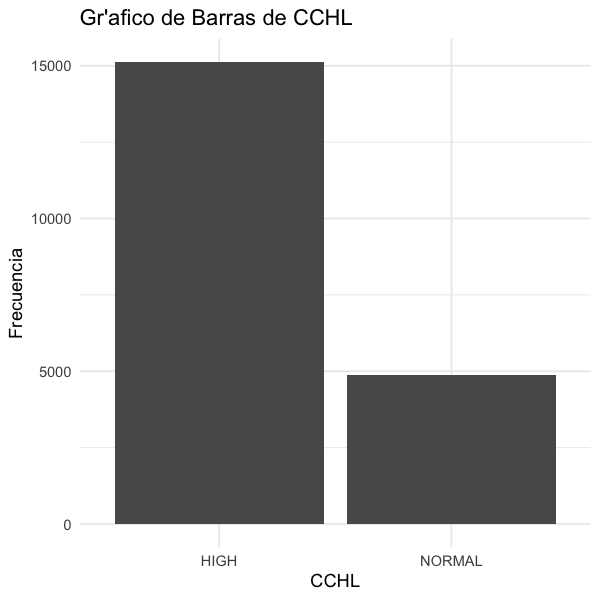

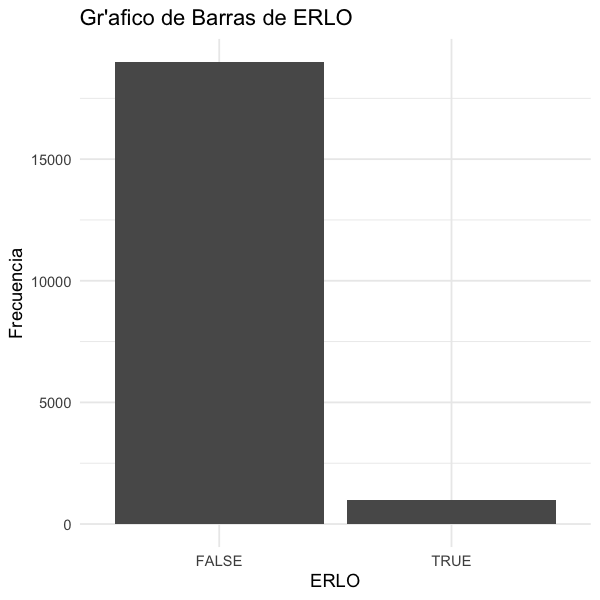

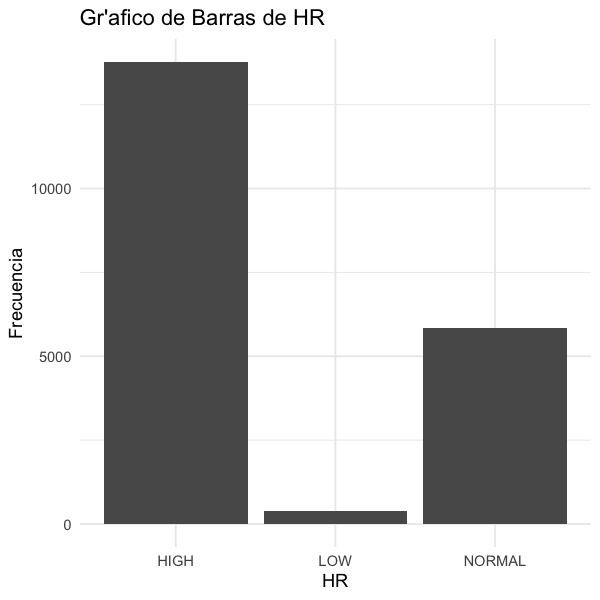

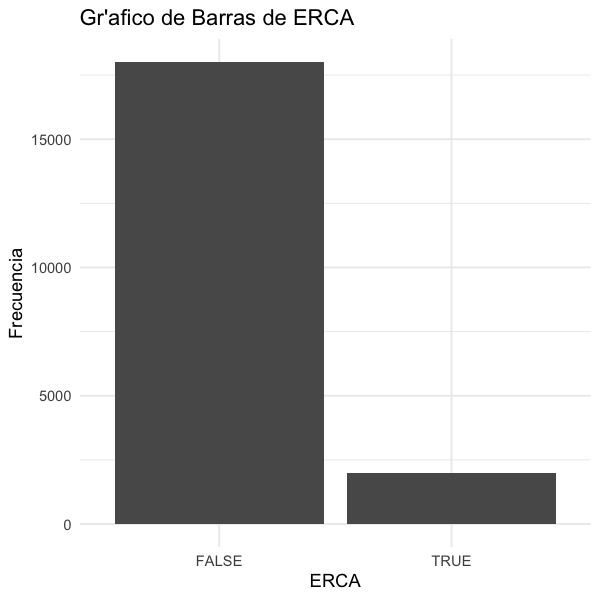

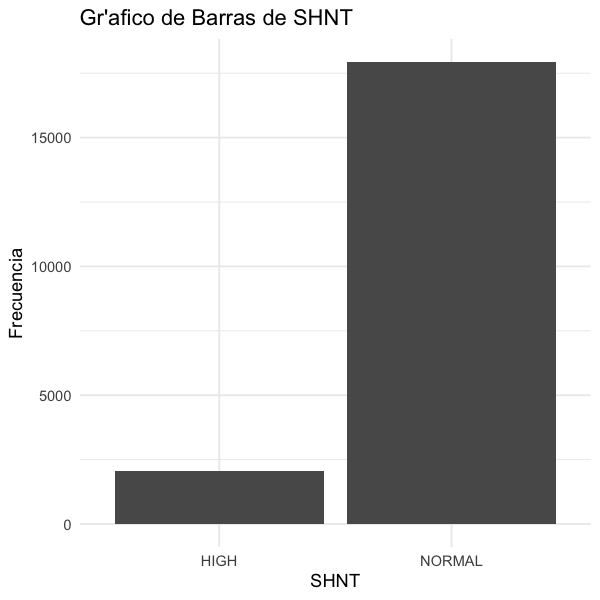

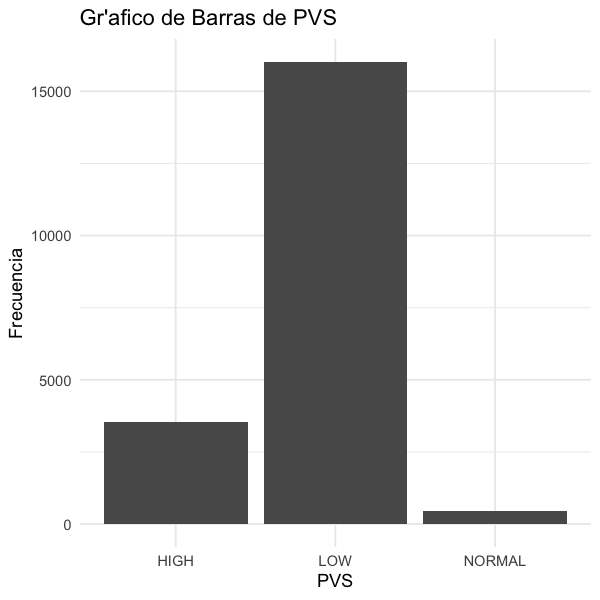

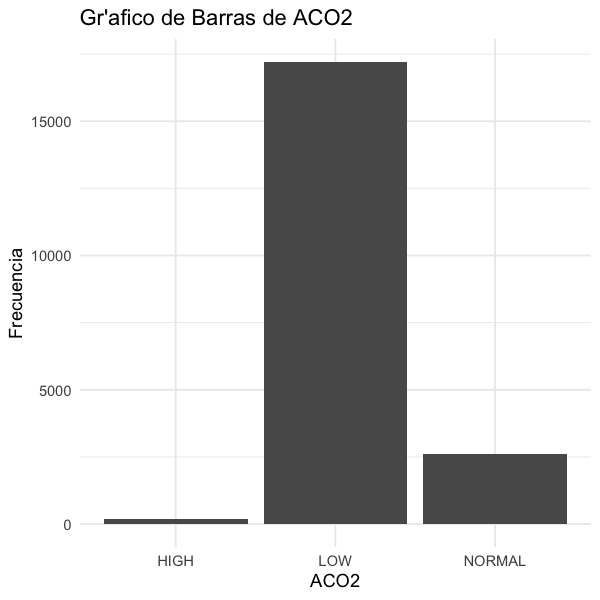

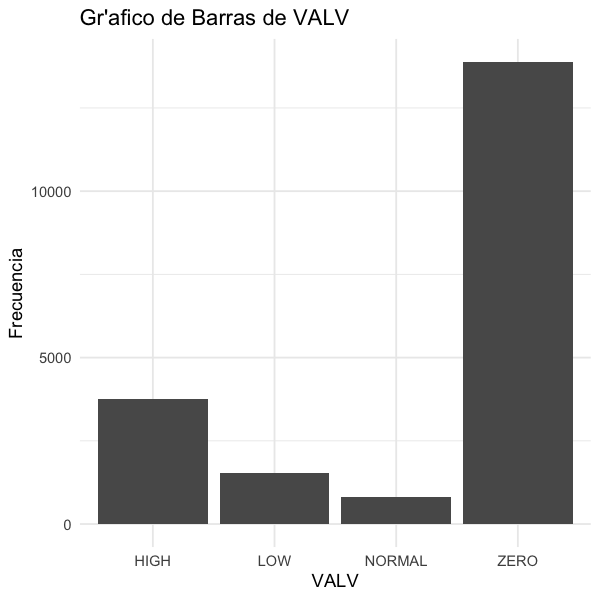

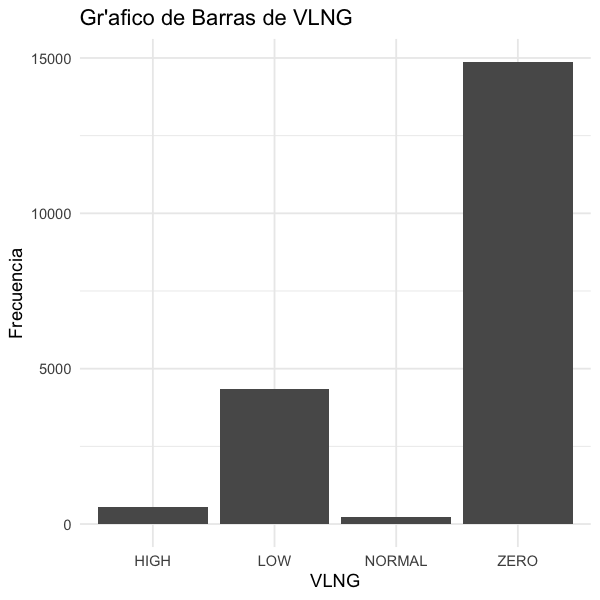

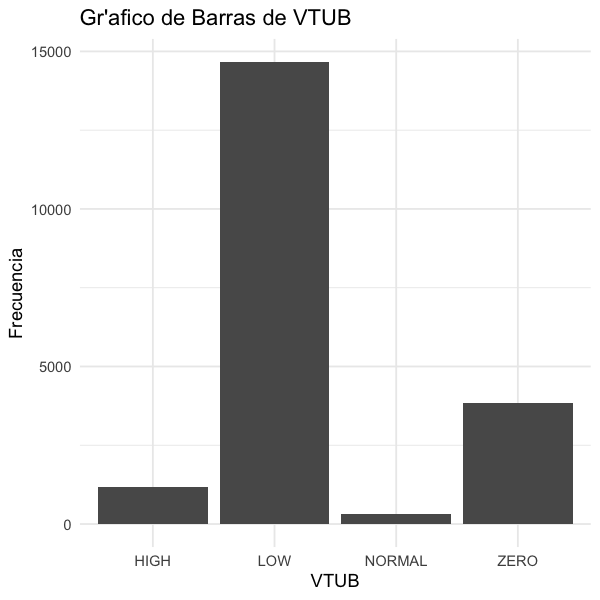

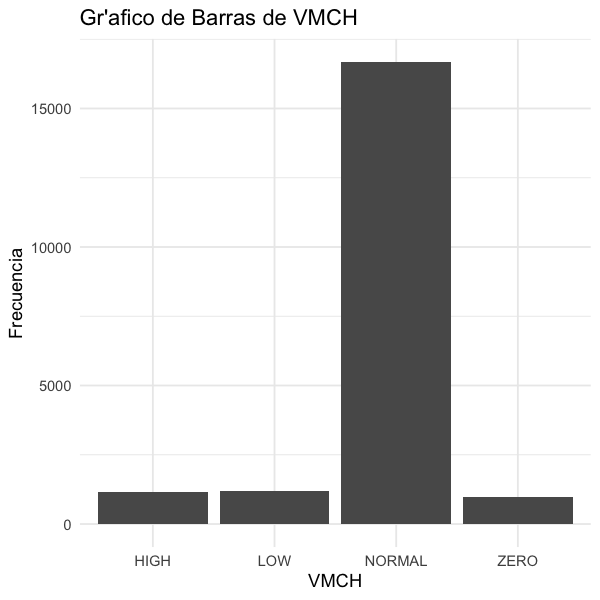

In [80]:

# Cargar el conjunto de datos "alarm"
data("alarm")

# Ver las primeras filas del conjunto de datos
head(alarm)

# Generar estadísticas básicas para cada variable
summary(alarm)

# Crear un gráfico de barras para cada variable categórica
par(mfrow = c(4, 4)) # Ajusta el layout según el número de variables
for (variable in names(alarm)) {
  print(
    ggplot(alarm, aes_string(x = variable)) +
      geom_bar() +
      theme_minimal() +
      labs(title = paste("Gráfico de Barras de", variable),
           x = variable,
           y = "Frecuencia")
  )
}


In [82]:
# Ajustar el tamaño de los gráficos por defecto para la red bayesiana
options(repr.plot.width = 20, repr.plot.height = 20)


### Aplicando Hill-Climbing
El método Hill-Climbing en el contexto de las redes bayesianas es un algoritmo de aprendizaje estructural que se utiliza para estimar la estructura de una red bayesiana a partir de datos. Es un enfoque heurístico basado en la búsqueda local para encontrar una estructura de red que mejor se adapte a un conjunto de datos dado.


  Bayesian network learned via Score-based methods

  model:
   [HIST][HRBP][PAP][FIO2][ANES][ERCA][LVF|HIST][PMB|PAP][ERLO|HRBP][PCWP|LVF]
   [HR|HRBP:ERLO][HREK|HR:ERCA][HRSA|HR:ERCA][LVV|PCWP:LVF][CCHL|HR][CVP|LVV]
   [MINV|CCHL][STKV|LVF:LVV][CO|STKV:HR][HYP|LVV:STKV][VALV|MINV][INT|MINV:VALV]
   [PVS|FIO2:VALV][ACO2|CCHL:VALV][PRSS|INT:VALV][SHNT|PMB:INT]
   [VLNG|MINV:INT:VALV][SAO2|SHNT:PVS][ECO2|ACO2:VLNG][KINK|PRSS:VLNG]
   [VTUB|PRSS:MINV:INT][TPR|SAO2:CCHL][DISC|VTUB][BP|TPR:CO][APL|TPR]
   [VMCH|DISC:VTUB][MVS|VMCH]
  nodes:                                 37 
  arcs:                                  53 
    undirected arcs:                     0 
    directed arcs:                       53 
  average markov blanket size:           3.46 
  average neighbourhood size:            2.86 
  average branching factor:              1.43 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:       

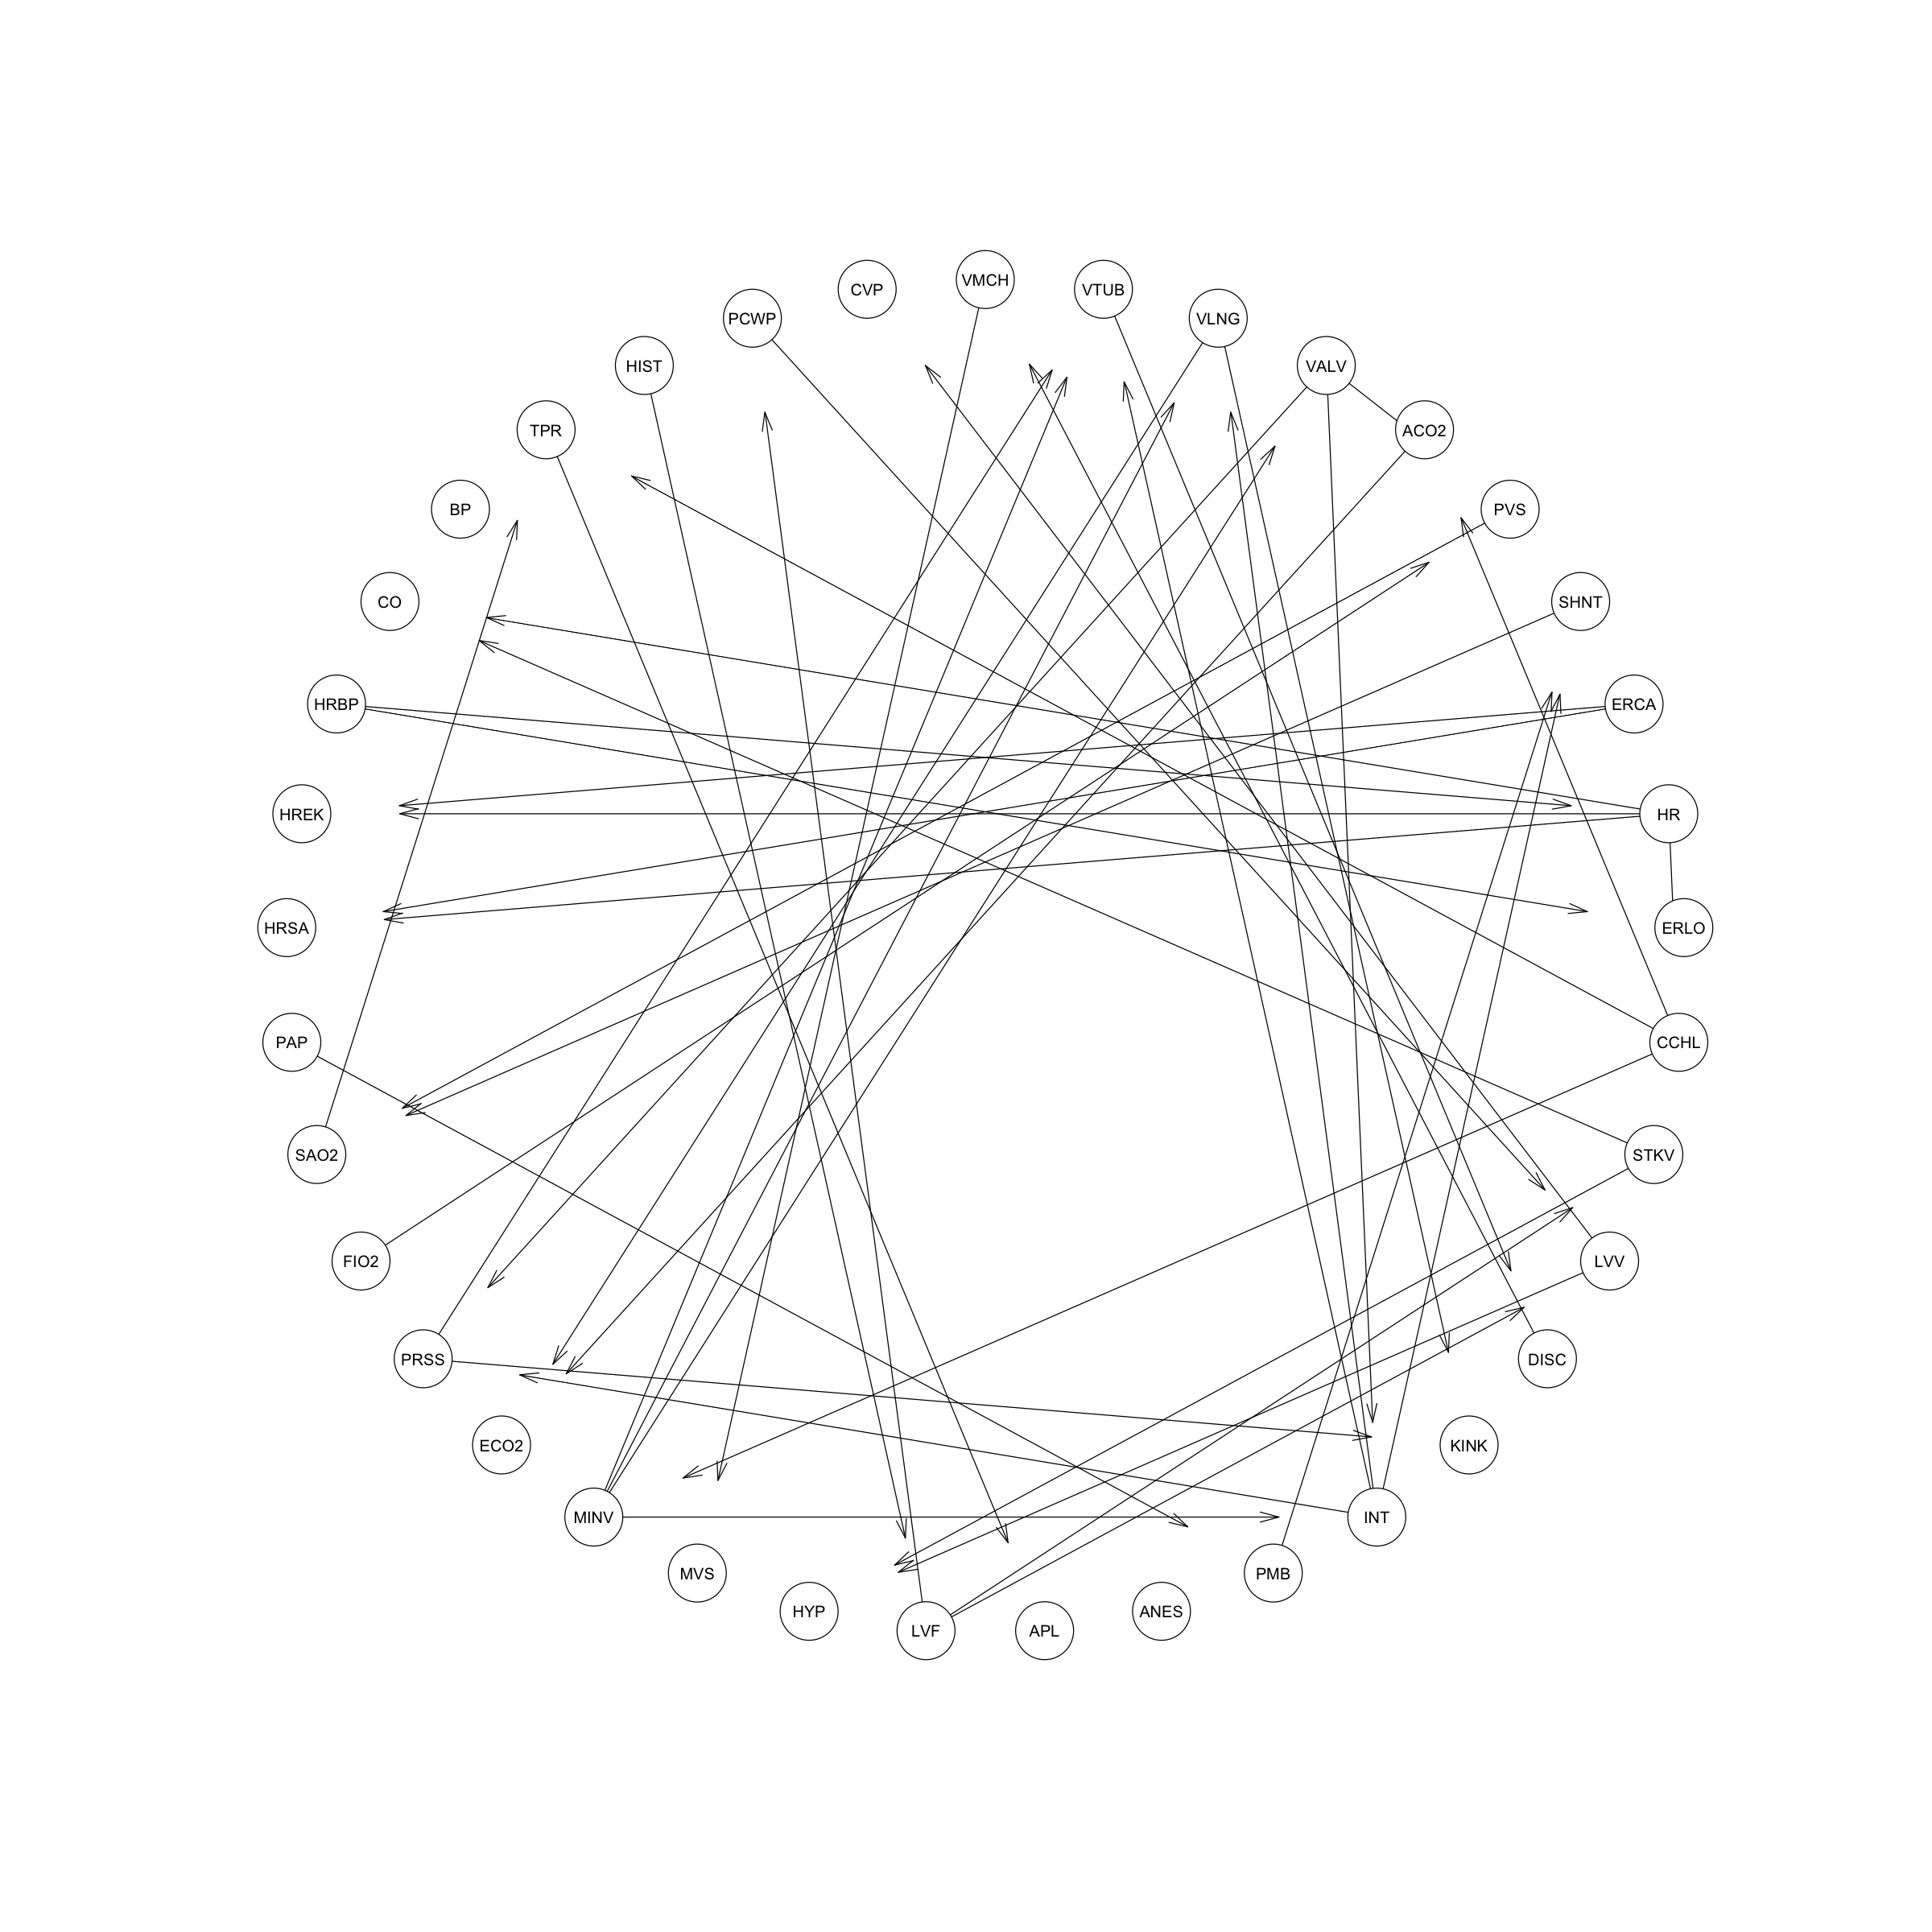

In [84]:
# load the data.
data(alarm)
# create and plot the network structure.
df <- alarm
res <- hc(df)
plot(res)
print(res)
sc<-score(res,df) # BIC por default
print(sc)


### Aplicando MMPC (Max-Min Parents and Children)
El método Max-Min Parents and Children (MMPC) es un algoritmo utilizado en el aprendizaje de redes bayesianas, especialmente para la selección de las variables más relevantes (padres y niños) asociadas con cada variable objetivo en un conjunto de datos. El objetivo principal del MMPC es identificar un subconjunto de variables que son condicionalmente dependientes de la variable objetivo, reduciendo así la complejidad del proceso de aprendizaje de la red.


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 37 
  arcs:                                  32 
    undirected arcs:                     32 
    directed arcs:                       0 
  average markov blanket size:           1.73 
  average neighbourhood size:            1.73 
  average branching factor:              0.00 

  learning algorithm:                    Max-Min Parent Children 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  8063 



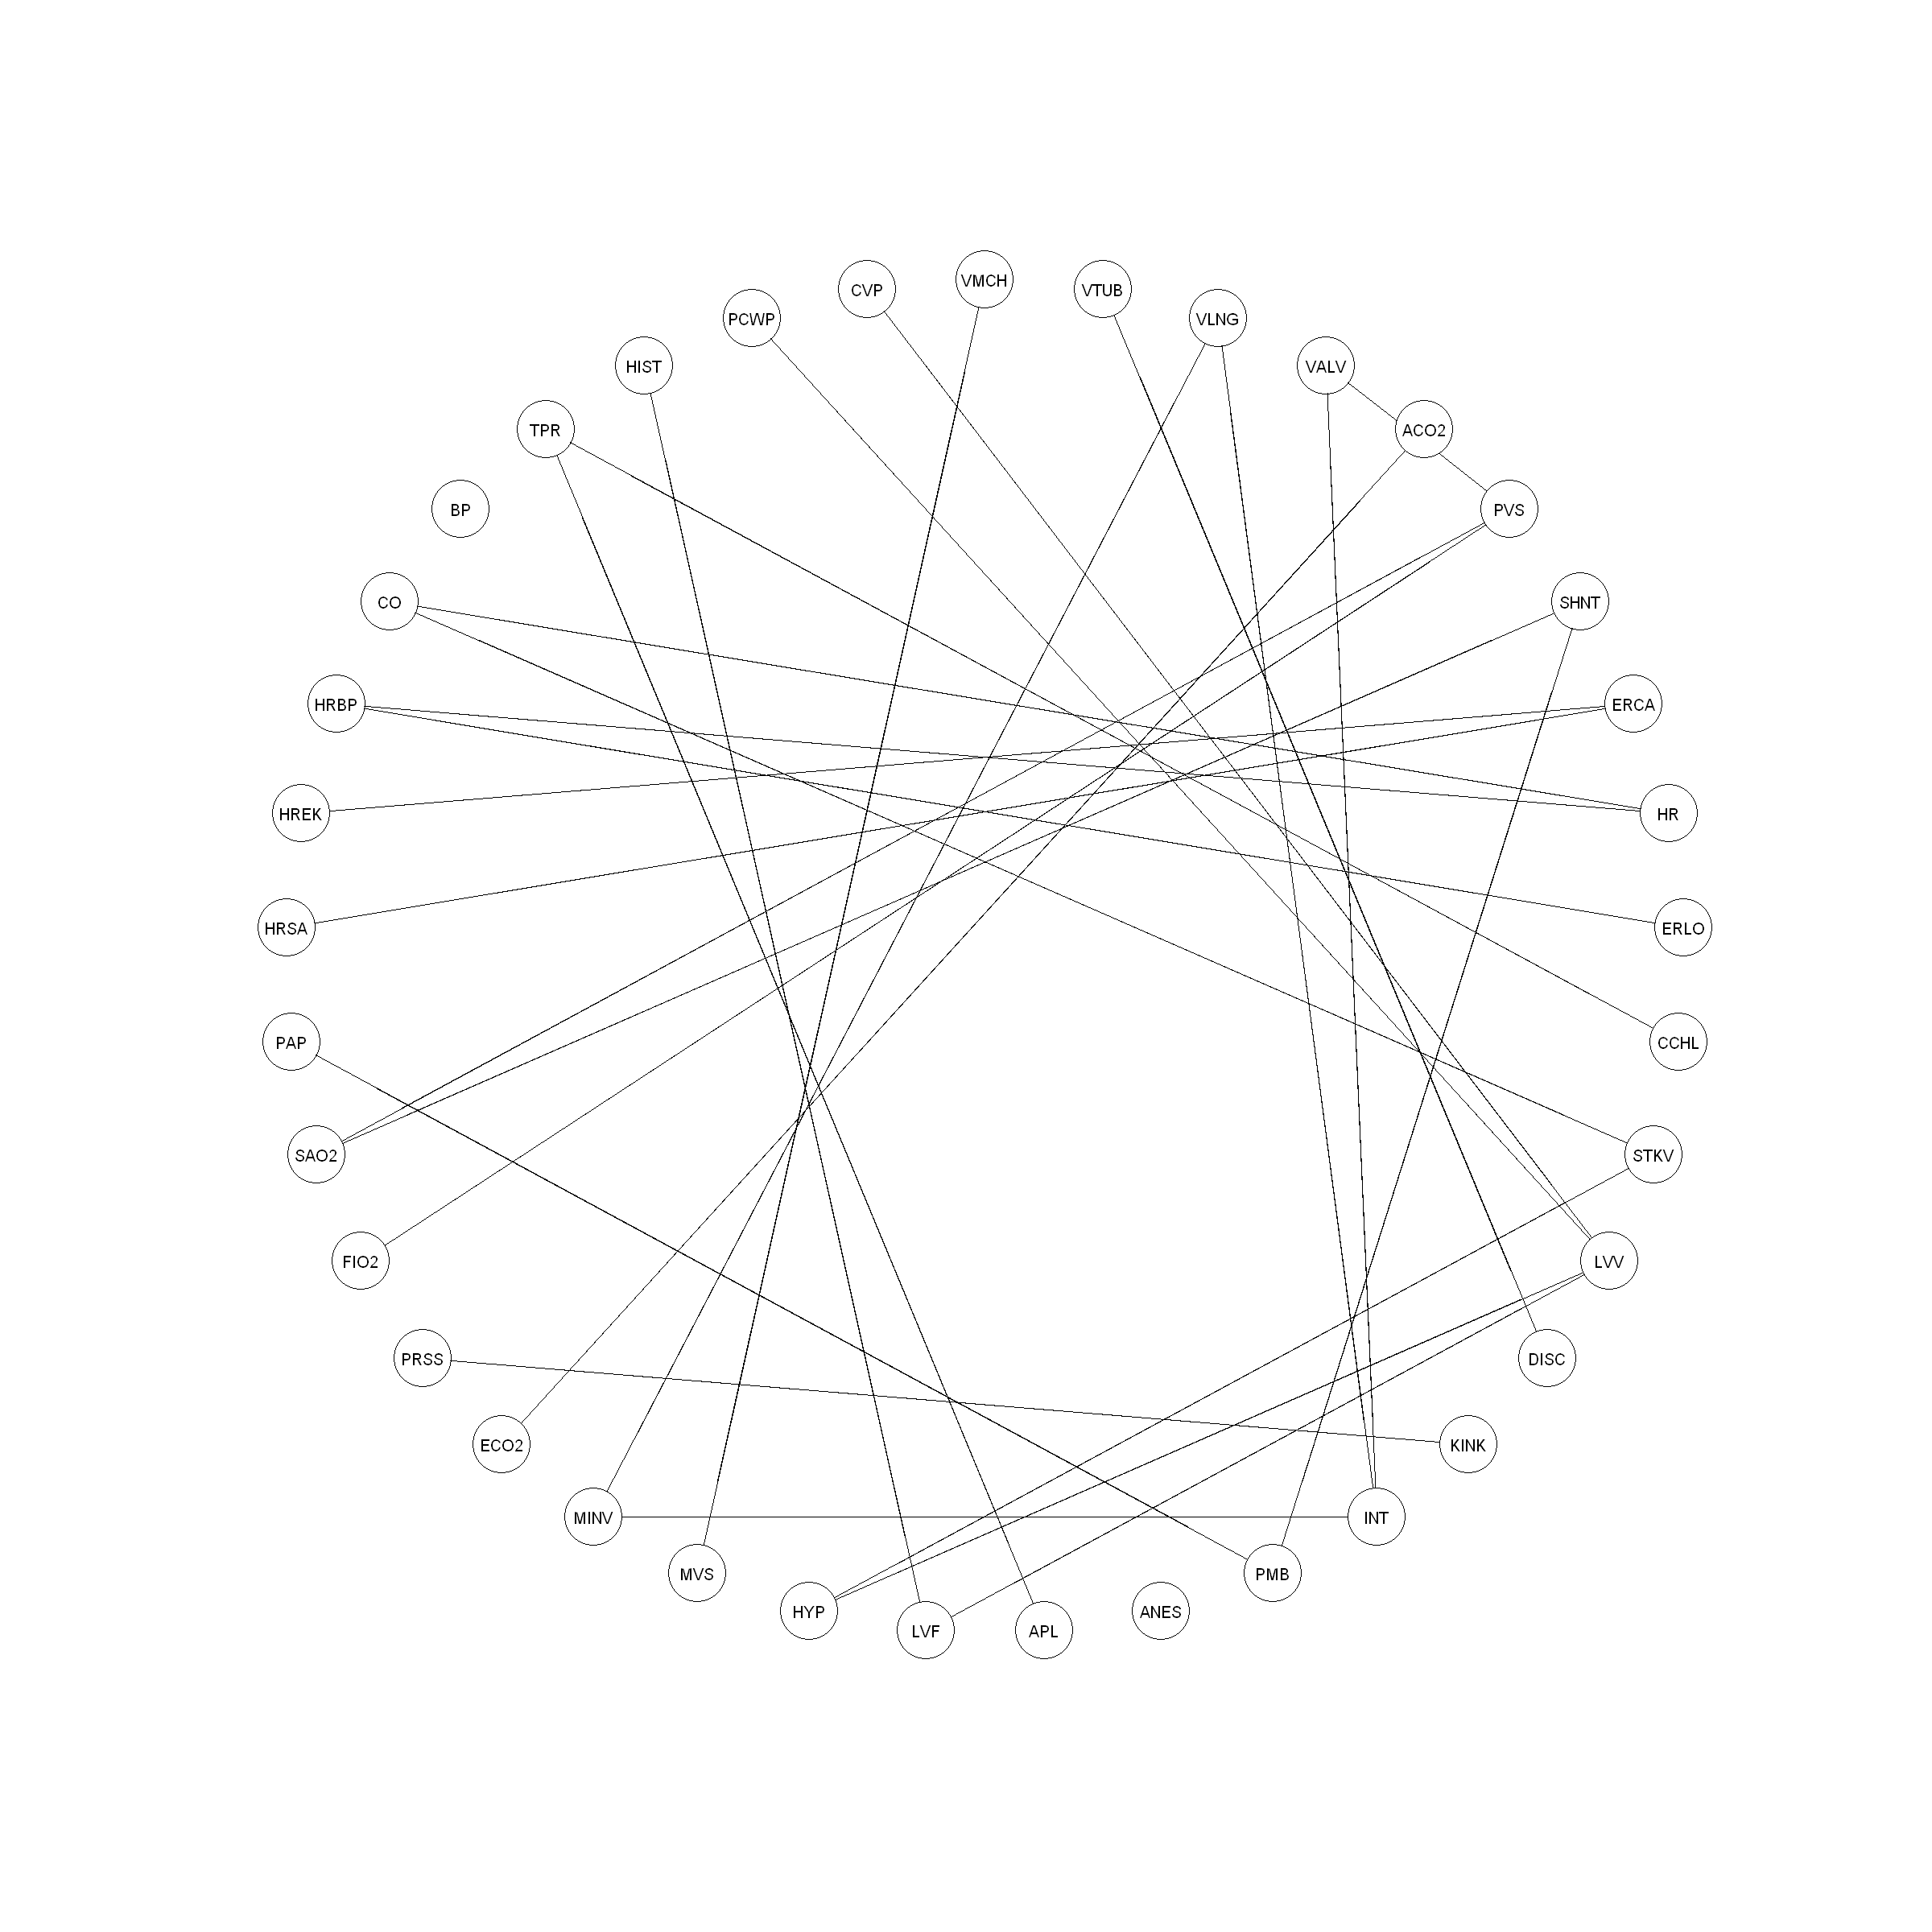

In [15]:
# create and plot the network structure.
df <- alarm
res <- mmpc(df)
plot(res)
print(res)
#sc<-score(res,df) # BIC por default
#print(sc)

### Aplicando Max-Min Hill-Climbing
El método Max-Min Hill-Climbing (MMHC) es una variante del algoritmo de Hill-Climbing tradicional diseñado para aprender la estructura de redes bayesianas a partir de datos. Esta metodología combina dos enfoques: el Max-Min Parents and Children (MMPC) para la selección de variables y el Hill-Climbing para la optimización de la estructura de la red.


  Bayesian network learned via Hybrid methods

  model:
   [PCWP][TPR][HRBP][HREK][PAP][PRSS][ECO2][ANES][DISC][PVS][VMCH][HRSA|HREK]
   [FIO2|PVS][MVS|VMCH][APL|TPR][PMB|PAP][KINK|PRSS][LVV|PCWP][CCHL|TPR]
   [ERLO|HRBP][HR|HRBP][ACO2|ECO2][VALV|PVS][VTUB|DISC:VMCH][CVP|LVV][HYP|LVV]
   [LVF|LVV][INT|VALV][ERCA|HREK:HRSA][SHNT|PMB][HIST|LVF][SAO2|SHNT:PVS]
   [MINV|INT][STKV|HYP][CO|STKV:HR][VLNG|MINV:INT][BP|TPR:CO]
  nodes:                                 37 
  arcs:                                  32 
    undirected arcs:                     0 
    directed arcs:                       32 
  average markov blanket size:           1.95 
  average neighbourhood size:            1.73 
  average branching factor:              0.86 

  learning algorithm:                    Max-Min Hill-Climbing 
  constraint-based method:               Max-Min Parent Children 
  conditional independence test:         Mutual Information (disc.) 
  score-based method:                    Hill-Climbing 
 

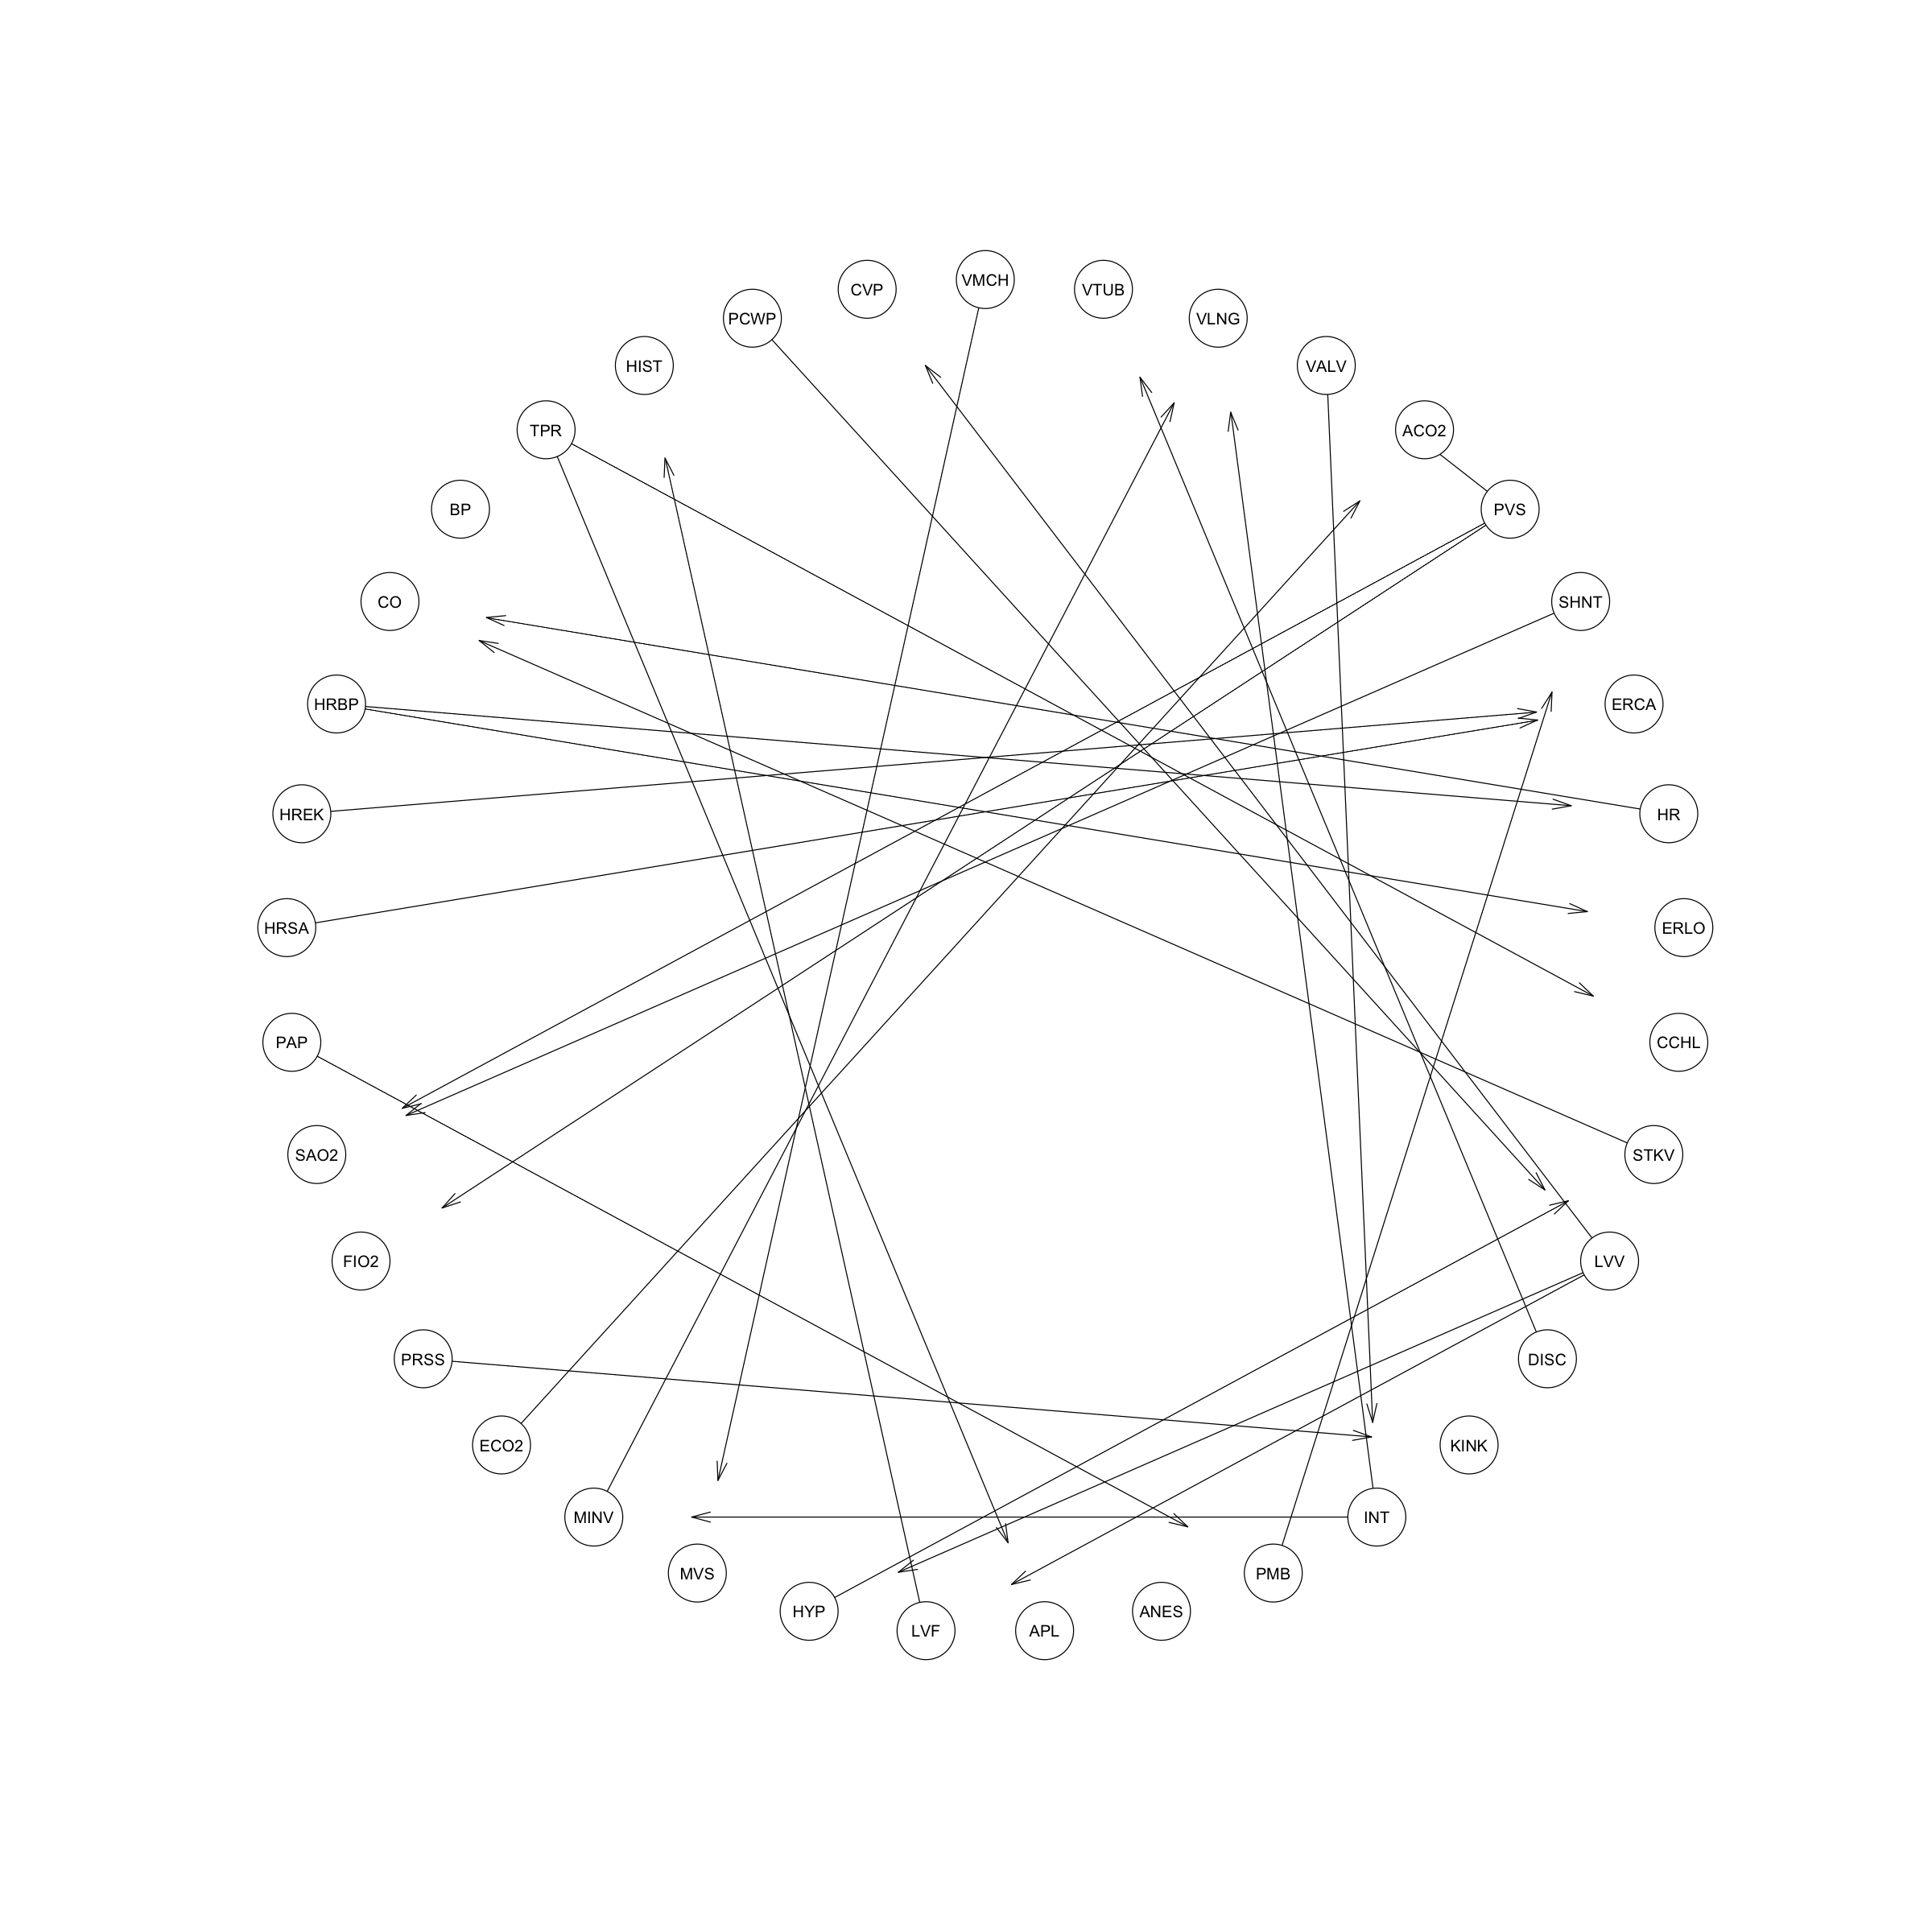

In [85]:
# create and plot the network structure.
df <- alarm
res <- mmhc(df)
plot(res)
print(res)
sc<-score(res,df) # BIC por default
print(sc)

### Comparando los distintos modelos
La estructura de referencia para este problema, fue extraída de I. A. Beinlich, H. J. Suermondt, R. M. Chavez, and G. F. Cooper. The ALARM Monitoring System: A Case Study with Two Probabilistic Inference Techniques for Belief Networks.
![modelo](./theory_model.jpg)
Este modelo se puede observar que los notodos de medición son los que se encuentran rellenados con puntos, los nodos intermedios son los que su relleno es vacío y los nodos de diagnóstico son los de relleno ennegrecido.

### Ajuste del modelo más parecido
Dado que el primer modelo (Hill Climbing) es el que más coincidencias tiene con el modelo teórico, es que se procede a transformar por medio de listas blancas y negras para lograr una similitud similar al modelo teórico


,CVP,PCWP,HIST,TPR,BP,CO,HRBP,HREK,HRSA,PAP,...,ERLO,HR,ERCA,SHNT,PVS,ACO2,VALV,VLNG,VTUB,VMCH
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,NORMAL,NORMAL,FALSE,LOW,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,NORMAL,NORMAL,HIGH,LOW,ZERO,NORMAL
2,NORMAL,NORMAL,FALSE,NORMAL,LOW,LOW,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL
3,NORMAL,HIGH,FALSE,NORMAL,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL
4,NORMAL,NORMAL,FALSE,LOW,LOW,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,NORMAL,LOW,ZERO,ZERO,LOW,NORMAL
5,NORMAL,NORMAL,FALSE,LOW,LOW,NORMAL,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL
6,NORMAL,NORMAL,FALSE,LOW,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,...,FALSE,HIGH,FALSE,NORMAL,LOW,LOW,ZERO,ZERO,LOW,NORMAL



  Bayesian network learned via Score-based methods

  model:
   [HIST][PAP][FIO2][MINV][HYP][ANES][ERCA][LVF|HIST][APL|HYP][PMB|PAP]
   [VALV|MINV][TPR|APL][INT|MINV:VALV][LVV|HYP:LVF][STKV|HYP:LVF][PVS|FIO2:VALV]
   [ACO2|VALV][CVP|LVV][PCWP|LVV][ERLO|TPR][SHNT|PMB:INT][VLNG|MINV:INT:VALV]
   [SAO2|SHNT:PVS][ECO2|ACO2:VLNG][KINK|VLNG][PRSS|INT:KINK:VALV]
   [CCHL|TPR:SAO2:ANES:ACO2][HR|CCHL][VTUB|PRSS:MINV:INT][CO|STKV:HR]
   [HRBP|ERLO:HR][HREK|HR:ERCA][HRSA|HR:ERCA][DISC|VTUB][BP|TPR:CO]
   [VMCH|DISC:VTUB][MVS|VMCH]
  nodes:                                 37 
  arcs:                                  52 
    undirected arcs:                     0 
    directed arcs:                       52 
  average markov blanket size:           3.78 
  average neighbourhood size:            2.81 
  average branching factor:              1.41 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              4

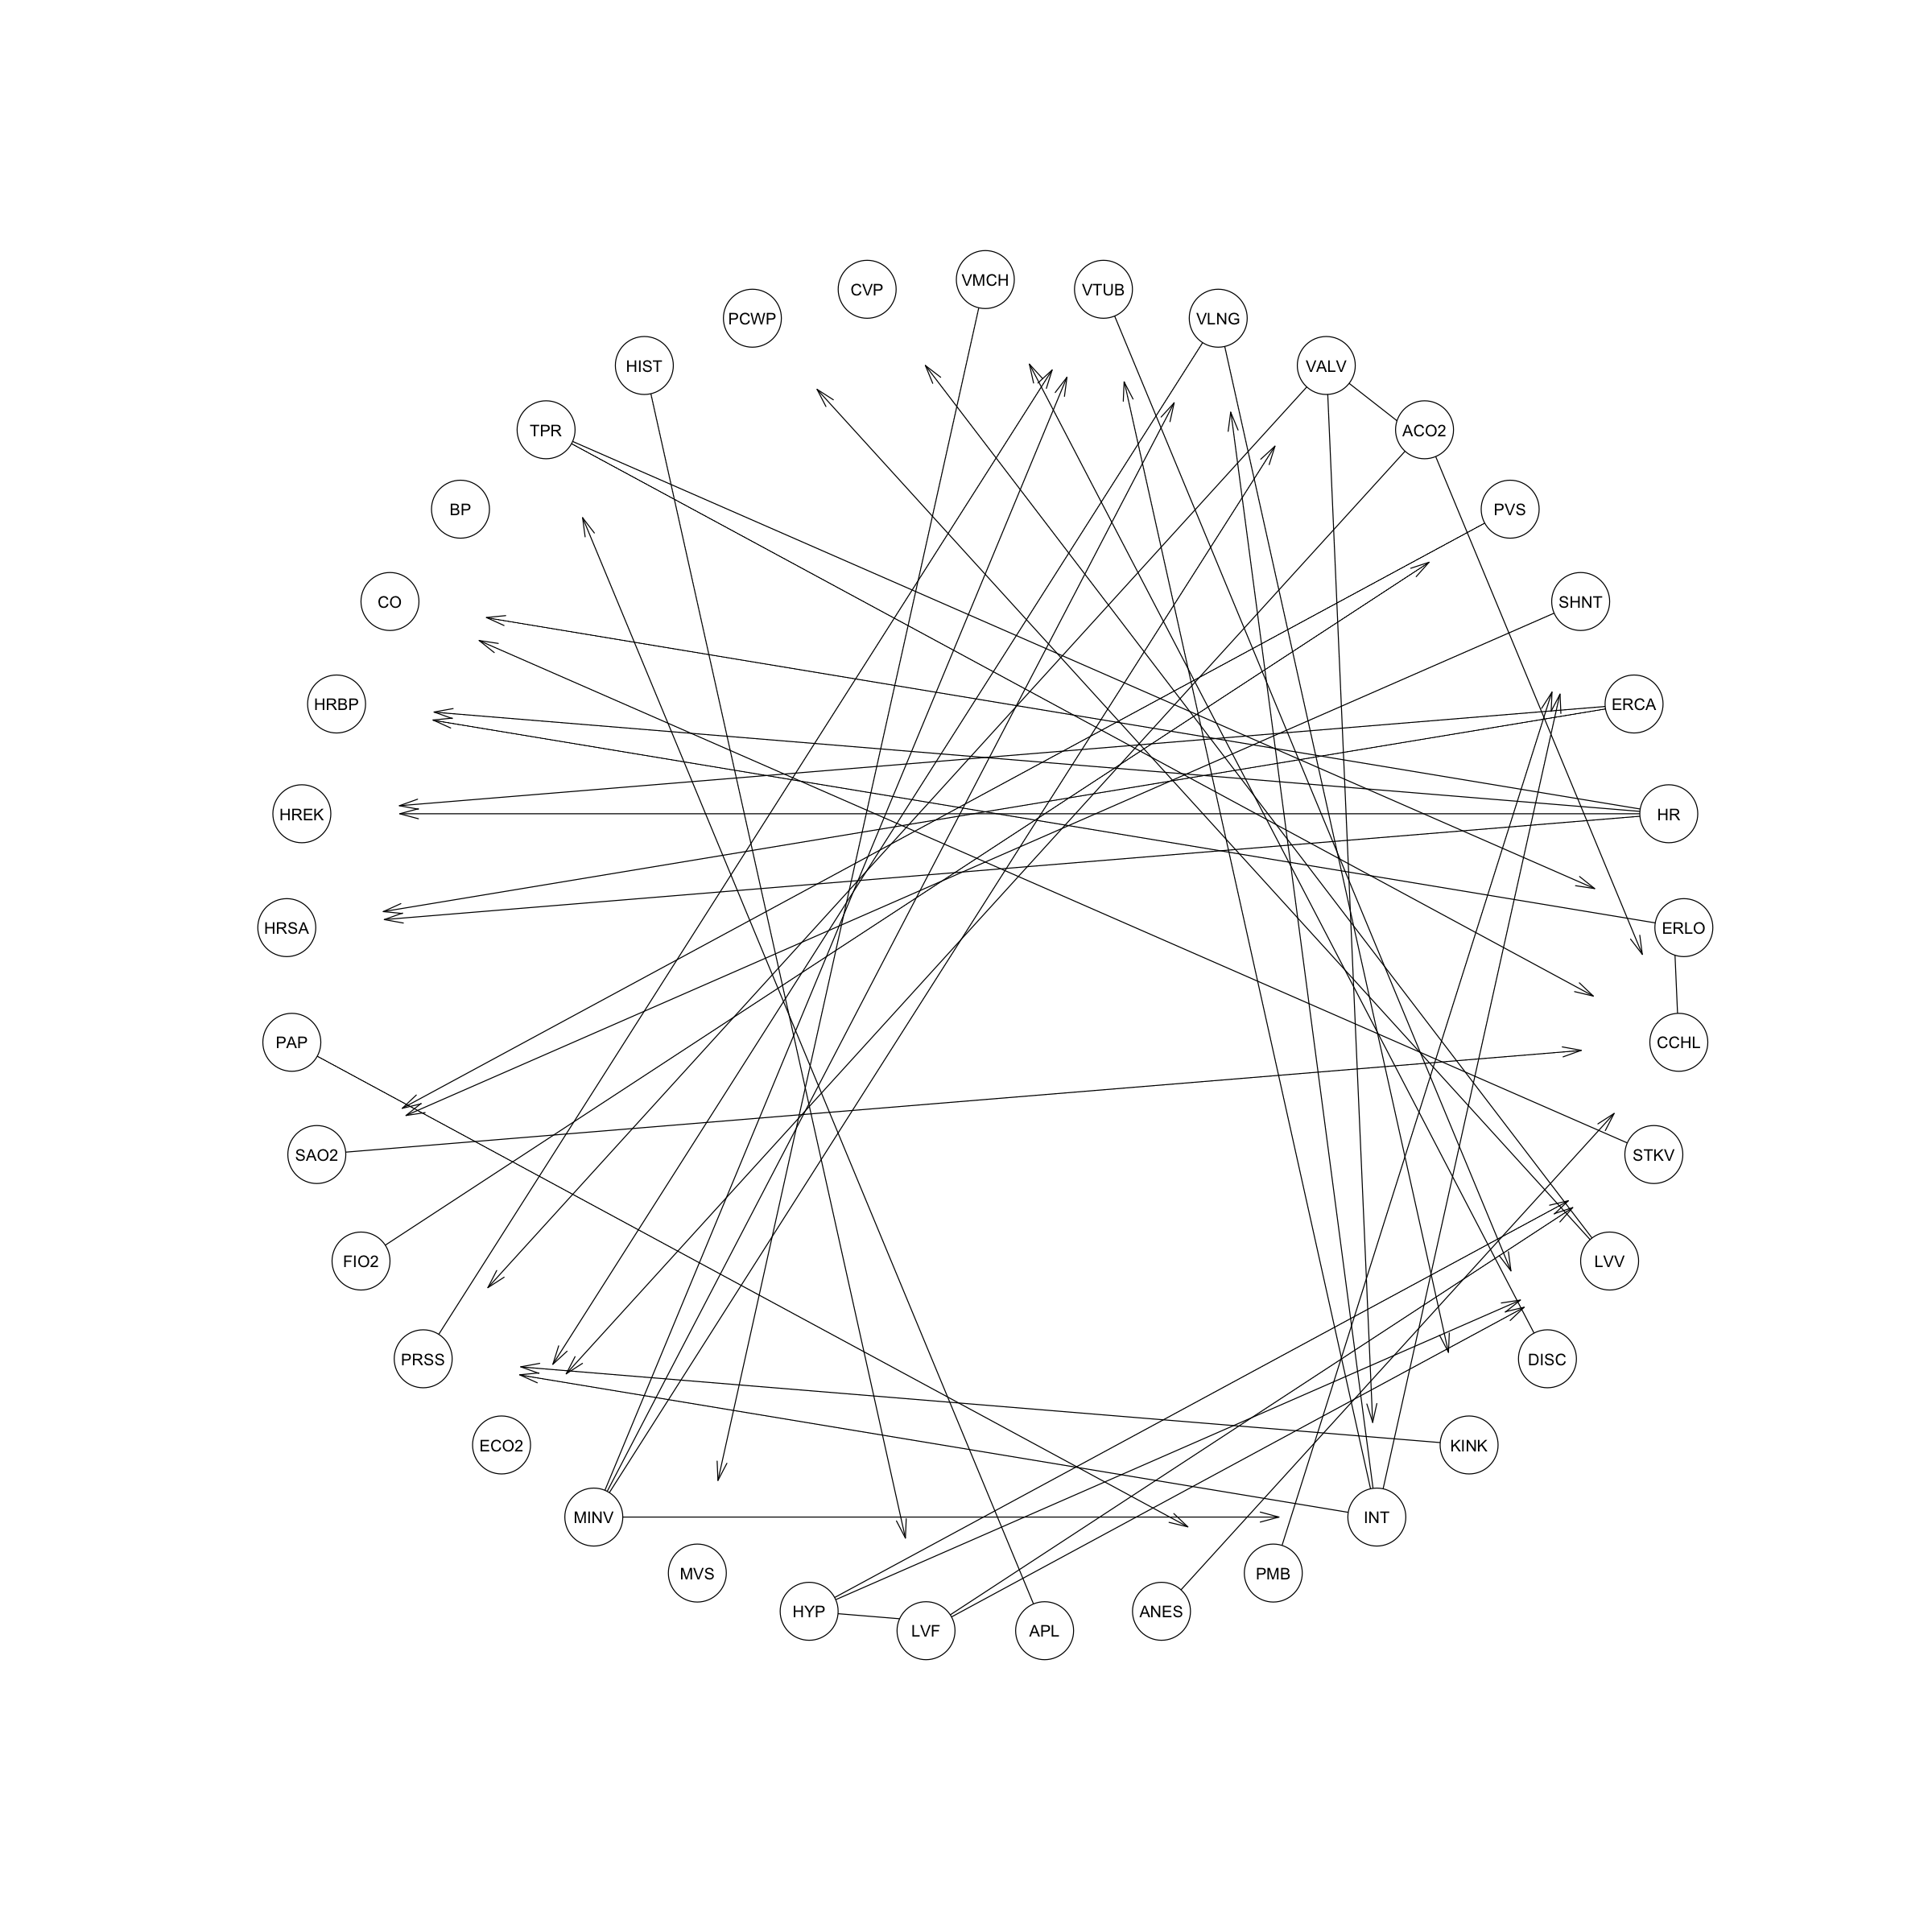

In [86]:
# load the data.
data(alarm)
df <- alarm
head(df)
# create and plot the network structure.
#bl <- data.frame("HR", "ERLO") #Lista negra de relaciones
wl <- data.frame(
  from = c("ERLO", "SAO2", "ANES", "KINK", "ACO2", "TPR", "CCHL", "HYP", "APL","TPR"),
  to = c("HRBP", "CCHL", "CCHL", "PRSS", "CCHL", "CCHL", "HR", "LVV", "TPR","ERLO")
)
bl <- data.frame(
  from = c("LVV"),
  to = c("HYP")
)
#Lista blanca de relaciones
res <- hc(bn_df, whitelist = wl, blacklist = bl)
plot(res)
print(res)
sc <- score(res,bn_df) # BIC por default
print(sc)

### CPQueries
Se procenden a hacer las consultas al modelo.

#### Consultas relacionadas con el sentido médico
A continuación se procede a realizar consultas teniendo en cuenta el contexto del problema, intentado relacionar el sentido médico con la causalidad.

In [39]:
fittedbn <- bn.fit(res, data = df) # Se obtiene la tabla de probabilidades condicionales mediante EM. (Máxima Expectación, propagación de la evidencia)

In [66]:
# Probabilidad de hipovolemia dado un bajo volumen de sangre venosa central (CVP) y presión arterial baja (BP):
cpquery(fittedbn, event = (HYP == "TRUE"), evidence = (CVP == "LOW") & (BP == "LOW"))

[1] 0.1392557

In [67]:
# Probabilidad de fallo ventricular izquierdo dado un alto nivel de presión arterial pulmonar (PAP) y una presión arterial normal (BP):
cpquery(fittedbn, event = (LVF == "TRUE"), evidence = (PAP == "HIGH") & (BP == "NORMAL"))


[1] 0.04102564

In [68]:
# Probabilidad de tener una saturación de oxígeno arterial baja (SAO2) con una fracción normal de oxígeno inspirado (FIO2) y una presión arterial normal (BP):
cpquery(fittedbn, event = (SAO2 == "LOW"), evidence = (FIO2 == "NORMAL") & (BP == "NORMAL"))


[1] 0.778352

In [69]:
# Probabilidad de embolia pulmonar (PMB) dada una alta resistencia periférica total (TPR) y una presión arterial normal (BP):
cpquery(fittedbn, event = (PMB == "TRUE"), evidence = (TPR == "HIGH") & (BP == "NORMAL"))



[1] 0.00996483

In [70]:
# Probabilidad de una presión de ventilación anormal (PRSS) dada una producción baja de CO2 (ECO2) y un bajo volumen mínimo (MINV):
cpquery(fittedbn, event = (PRSS != "NORMAL"), evidence = (ECO2 == "LOW") & (MINV == "LOW"))



[1] 0.9299363